## Import Data from Database

In [47]:
import os
import psycopg2
import pandas as pd

host = 'localhost'
database = 'dsa3101' # default db name
user = 'postgres'
post_pwd = os.environ["POSTGRES_PASSWORD"]
post_port = 5434


conn = psycopg2.connect(
    host=host,
    user=user,
    password=post_pwd,
    port=post_port,
    database=database)

cursor = conn.cursor()
cursor.execute("SELECT * FROM RATINGS AS R LEFT JOIN PRODUCTS AS P ON  R.PRODUCT_ID = P.PRODUCT_ID ")
rows= cursor.fetchall()  # Use fetchall() to get all rows, or fetchone() to get a single row
column_names = [desc[0] for desc in cursor.description]

# Create the DataFrame with column names
df = pd.DataFrame(rows, columns=column_names)

In [48]:
df.to_csv("data/product_ratings.csv",index = False)

## Read in Data

In [98]:
product_ratings_df = pd.read_csv("data/product_ratings.csv")
product_ratings_df.rename(columns={
    'review_title': 'short_reviews',
    'review_content': 'long_reviews'
}, inplace=True)

In [50]:
product_ratings_df

,product_id,average_rating,review_title,review_content,rating_count,product_id.1,product_name,about_product,category,actual_price,discounted_price,discount_percentage
0,B002PD61Y4,4.1,"good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,16262,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Connects your computer to a high-speed wireles...,Computers&Accessories|NetworkingDevices|Networ...,14.50,6.08,0.58
1,B002SZEOLG,4.2,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,179692,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,150 Mbps Wi-Fi —— Exceptional wireless speed u...,Computers&Accessories|NetworkingDevices|Networ...,16.07,8.99,0.44
2,B003B00484,4.3,"Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",27201,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Duracell Rechargeable AAA 750mAh batteries sta...,Electronics|GeneralPurposeBatteries&BatteryCha...,5.99,4.79,0.20
3,B003L62T7W,4.3,"Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",31534,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...","A comfortable, ambidextrous shape feels good i...",Computers&Accessories|Accessories&Peripherals|...,4.50,3.35,0.26
4,B004IO5BMQ,4.5,"Good silent mouse,Too small to hold!,Reviewing...",It's little small for big hands. But best avai...,54405,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",You can surf the Web with more comfort and eas...,Computers&Accessories|Accessories&Peripherals|...,11.94,8.39,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B0BPCJM7TB,4.0,"Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,43,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,The battery operated milk frother is easy to c...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,11.99,3.11,0.74
1347,B0BPJBTB3F,2.0,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,Khaitan Orfin Fan heater for Home and kitchen|...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",29.94,15.59,0.48
1348,B0BQ3K23Y1,4.8,"Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",28,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",-Make delicious milk foam creamer for your dri...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,5.99,3.35,0.44
1349,B0BQRJ3C47,5.0,Awesome Product,Quick delivery.Awesome ProductPacking was good...,0,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",💎[The Fastest Charge] - This iPhone USB C cabl...,Computers&Accessories|Accessories&Peripherals|...,11.99,2.99,0.75


In [51]:
!pip3 install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [52]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marcus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### `short_reviews` and `long_reviews` columns are a `str` of mutplie reviews

e.g "Works Good, Perfect replacement cell for trimmer,Wow,As they said in ad worth it,A good product,Fit for phillips trimmer.,Good,Good Product"

In [110]:
def get_vader_score(text:str):
    indiv_reviews = text.split(",") #split str into list of individual strs
    vader_scores = [analyzer.polarity_scores(text).get("compound") for text in indiv_reviews] # apply vader analysis to each reviews
    avg_vader_scores = sum(vader_scores)/len(vader_scores) # get avg vader scores over all reviews
    return avg_vader_scores


product_ratings_df['long_reviews_vader_analysis'] = product_ratings_df['long_reviews'].apply(get_vader_score)
product_ratings_df['short_reviews_vader_analysis'] = product_ratings_df['short_reviews'].apply(get_vader_score)


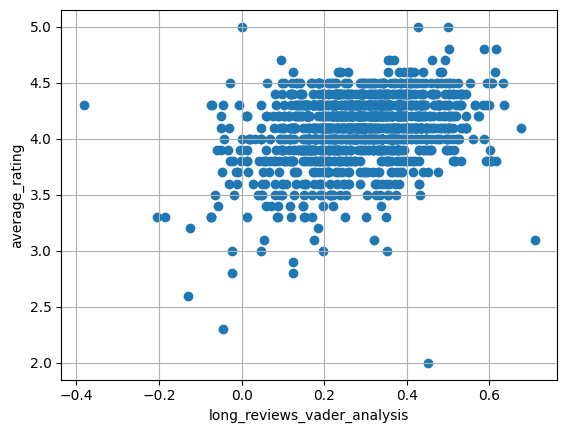

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(product_ratings_df['long_reviews_vader_analysis'], product_ratings_df['average_rating'])
plt.xlabel('long_reviews_vader_analysis')
plt.ylabel('average_rating')
plt.grid(True)
plt.show()

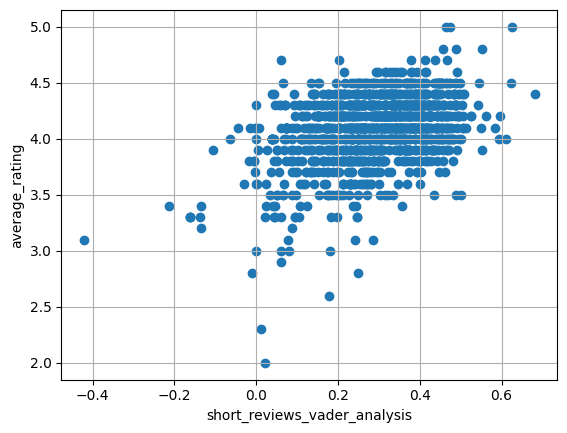

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(product_ratings_df['short_reviews_vader_analysis'], product_ratings_df['average_rating'])
plt.xlabel('short_reviews_vader_analysis')
plt.ylabel('average_rating')
plt.grid(True)
plt.show()

### Outliers

In [79]:
filtered_df = product_ratings_df[(product_ratings_df['review_title_vader_analysis'] < -0.75) & (product_ratings_df['average_rating'] > 4)]
print(list(filtered_df["review_title"]))

['Nice,Perfect. Reliable. Standard size. Good suction for 10*10 bathroom,Good but got costly at 1600,Good exhaust for bathroom,Good product,Request to Return/Exchange,Easy to use,No bad', "The best earphones you can find out there under 500 Bucks..??? Are they Comfortable..?? Let's find out.....,:( Not so good Not so bad :),Good but i don't recommend,Sexy,You can expect it to work for a year,Good buy but 1 side earphone stopped after 6-7 months,Vocals are good music is bit dizzy and there is a sound zzzzzzzzzz when everything is silent ..,Superb", "Dual Bandwidth,It's good,Simple and effective,Easy plug and play,Only 200mbps support,Great Device for Old Laptops,Good device but be careful for a defective one.,Excellent Speeds and Coverage! | Dual Bandwidth,It's good,Simple and effective,Easy plug and play,Only 200mbps support,Great Device for Old Laptops,Good device but be careful for a defective one.,Excellent Speeds and Coverage!", 'Product is good but the installation provider team i

In [69]:
filtered_df = product_ratings_df[product_ratings_df['vader_analysis'] < -0.5]
filtered_df

,product_id,average_rating,review_title,review_content,rating_count,product_id.1,product_name,about_product,category,actual_price,discounted_price,discount_percentage,vader_analysis
32,B009P2LK80,3.7,"Overall good product,Value for money 👍,Brand,H...",Product is very nice. But it has bigger socket...,787,B009P2LK80,Bajaj Deluxe 2000 Watts Halogen Room Heater (S...,Radiant Warmth: Ideal for use in in small room...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",19.67,16.91,0.14,-0.9552
69,B00KIDSU8S,4.2,"Nice,Perfect. Reliable. Standard size. Good su...","A reasonably good product,,A bit costly for me...",7801,B00KIDSU8S,Havells Ventil Air DX 200mm Exhaust Fan (White),Includes: 1 Fan;No. of blades: 5 ; Motor type:...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",28.32,23.99,0.15,-0.7768
93,B00N3XLDW0,3.8,"Not as per Description,It's not a 2800mAh batt...",Batteries does not charge as per the descripti...,40895,B00N3XLDW0,ENVIE ECR-20 Charger for AA & AAA Rechargeable...,LED indicator: Two LED indicators show the cha...,Electronics|Cameras&Photography|Accessories|Ba...,4.80,3.59,0.25,-0.8100
139,B014HDJ7ZE,3.9,"Yet to know the performance,Good,Hamara bajaj....",It's been just a week ... So yet to know the p...,3584,B014HDJ7ZE,Bajaj Majesty Duetto Gas 6 Ltr Vertical Water ...,Dimensions: 35.56 Cms X 19 Cms X 55 Cms,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",89.34,64.38,0.28,-0.9228
184,B01HJI0FS2,4.5,Big in size as comparison to other normal size...,I'm using this mouse from more than 6 months n...,33176,B01HJI0FS2,"Dell MS116 1000Dpi USB Wired Optical Mouse, Le...","Movement Detection: Optical, Resolution : 1000...",Computers&Accessories|Accessories&Peripherals|...,7.80,3.59,0.54,-0.8380
210,B01M5F614J,4.0,"Good product and recommend too,Good Purchase,I...",During winter it keeps room temperature hot wh...,2961,B01M5F614J,"Morphy Richards OFR Room Heater, 09 Fin 2000 W...",The oil-filled radiator with 9 fins will ensur...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",167.99,78.59,0.53,-0.8605
228,B06XGWRKYT,3.8,"This is a Best kodak LED,Product is Good as pe...",",Product is Good as per the price but customer...",3022,B06XGWRKYT,Kodak 80 cm (32 Inches) HD Ready LED TV Kodak ...,Resolution: HD Ready (1920 * 1080) | Refresh R...,"Electronics|HomeTheater,TV&Video|Televisions|S...",191.99,95.99,0.50,-0.5404
280,B078KRFWQB,3.8,"Products review,Good & easy to use.,Good and p...",Value for moneyHeat power goodOne loss point t...,2732,B078KRFWQB,"Havells Cista Room Heater, White, 2000 Watts",Cool touch body with One year warranty|Warrant...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",47.34,29.99,0.37,-0.7187
343,B07HK53XM4,3.5,"This is a good product,Not upto the expectatio...",The only issue is that the built quality is ve...,1367,B07HK53XM4,Bulfyss Plastic Sticky Lint Roller Hair Remove...,Package Contents: 1 Lint Roller with 5 Adhesiv...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",7.19,3.35,0.53,-0.7265
347,B07JB2Y4SR,4.4,"Very good,WORTH TO BUY.,Writes neat but smells...","Nice combination for color sketches,It glides ...",10718,B07JB2Y4SR,Classmate Octane Colour Burst-Multicolour Gel ...,10 Rich colours with silver and gold options|C...,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,1.20,1.08,0.10,-0.5688
